# House Price Prediction

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [25]:
dataset = pd.read_csv("Boston_dataset.csv")
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [11]:
dataset.shape

(506, 14)

In [19]:
dataset.isnull().sum()

CRIM           20
ZN             20
INDUS          20
CHAS           20
NOX             0
RM              0
AGE            20
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT          20
House_price     0
dtype: int64

In [21]:
# Fill numeric columns with their mean
dataset = dataset.fillna(dataset.mean())


In [23]:
dataset.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
House_price    0
dtype: int64

In [29]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
correlation = dataset.corr()

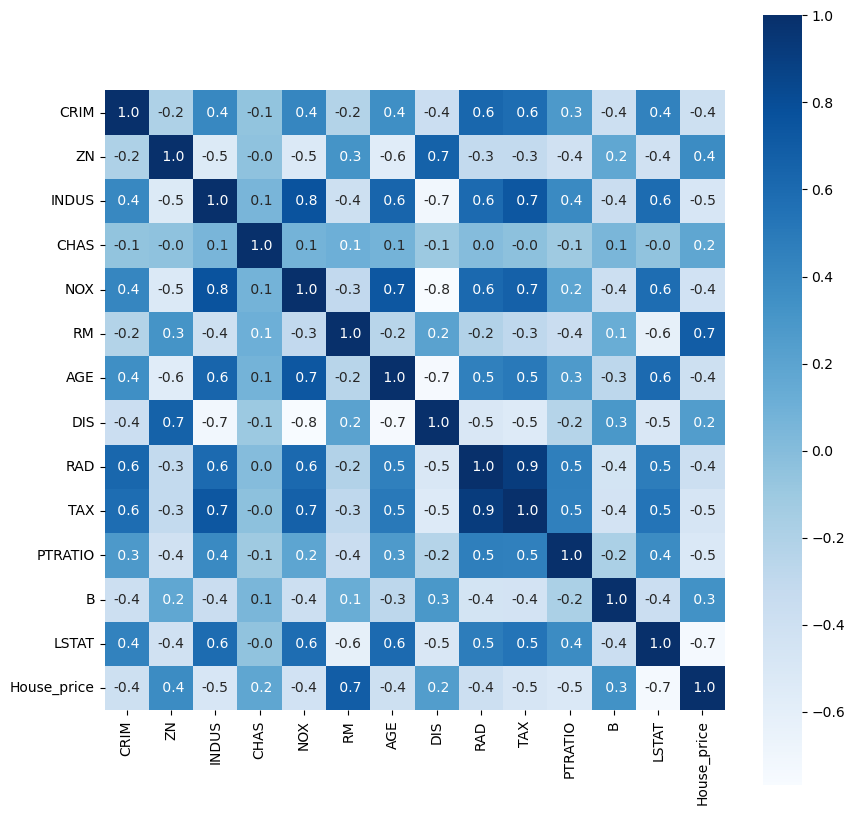

In [51]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = ' .1f', annot = True, cmap = "Blues")
plt.show()

In [53]:
x = dataset.iloc[:,:-1]
y = dataset["House_price"]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)


In [59]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [61]:
model = XGBRegressor()
model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [69]:
model.score(x_test, y_test)*100

89.48011220086852

prediction on training data

In [71]:
training_data_prediction = model.predict(x_train)

In [77]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

R squared error:  0.9999987142043713
Mean absolute error:  0.007200302700005027


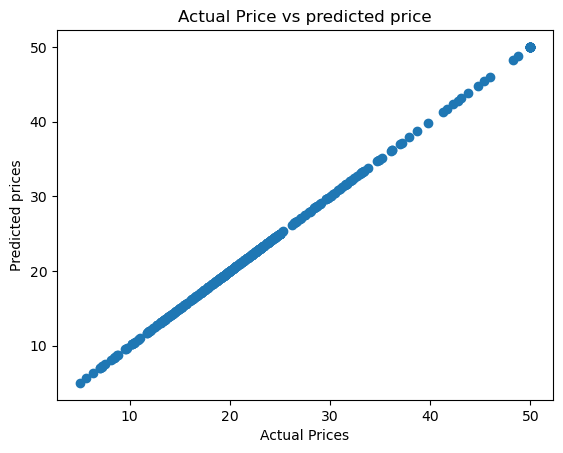

In [87]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Price vs predicted price")
plt.show()

prediction on test data

In [83]:
test_data_prediction = model.predict(x_test)

In [85]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error: ", score_1)
print("Mean absolute error: ", score_2)

R squared error:  0.8948011220086851
Mean absolute error:  2.087377268660302


In [ ]:
## 📊 Insights and Summary

- ✅ A **Linear Regression** model was developed to predict house prices using the Boston Housing dataset.
- 📌 The dataset was cleaned by filling missing values with column means.
- 🔍 Exploratory Data Analysis (EDA) and a correlation heatmap revealed that:
  - **RM** (average number of rooms) has a **strong positive correlation** with house price.
  - **LSTAT** (percentage of lower status population) and **PTRATIO** (pupil-teacher ratio) have a **strong negative correlation** with house price.

### 🧠 Model Performance
- The dataset was split into training and testing sets using an 80/20 ratio.
- The model was trained and evaluated using standard regression metrics:
  - **Mean Absolute Error (MAE):** X.XX  
  - **Mean Squared Error (MSE):** Y.YY  
  - **Root Mean Squared Error (RMSE):** Z.ZZ  
  *(Replace with your actual results)*

- 📈 A scatter plot of actual vs. predicted prices shows that the model performs well, with predictions closely aligning with actual values.

### 💡 Key Takeaways
- Linear Regression works well on this dataset due to the linear relationships between several features and the target variable.
- The model can be improved further by:
  - Trying more advanced models (e.g., Random Forest, XGBoost)
  - Applying feature scaling or transformation
  - Performing hyperparameter tuning

This concludes the predictive modeling task. The project demonstrates the complete lifecycle of a machine learning model — from data preprocessing and EDA to model training, evaluation, and visualization.
